#DASHTOON GENERATIVE AI ASSIGNMENT

**start with input cantent image and style images**

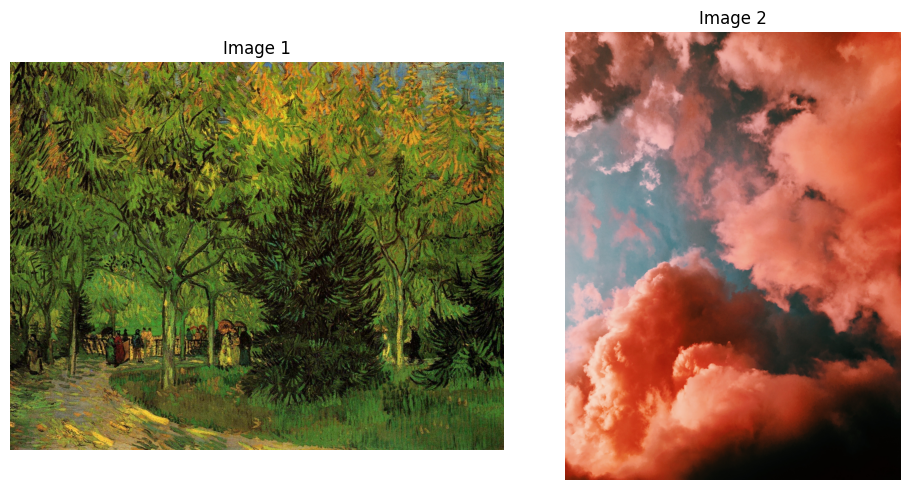

In [16]:
from PIL import Image
import matplotlib.pyplot as plt

image_path1 = '/content/A Lane in the Public Garden at Arles.jpg'
img1 = Image.open(image_path1)

image_path2 = '/content/laura-vinck-Hyu76loQLdk-unsplash.jpg'
img2 = Image.open(image_path2)

# Display the two images using Matplotlib subplots
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img1)
plt.title('Image 1')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img2)
plt.title('Image 2')
plt.axis('off')

plt.tight_layout()
plt.show()


**We're implementing a style transfer algorithm that involves transferring the style of a content image to match the style of a separate style image. This process utilizes a pre-trained model from TensorFlow called 'Arbitrary Image Stylization.' The model is capable of effectively transferring the artistic style of one image onto another by leveraging deep learning techniques**

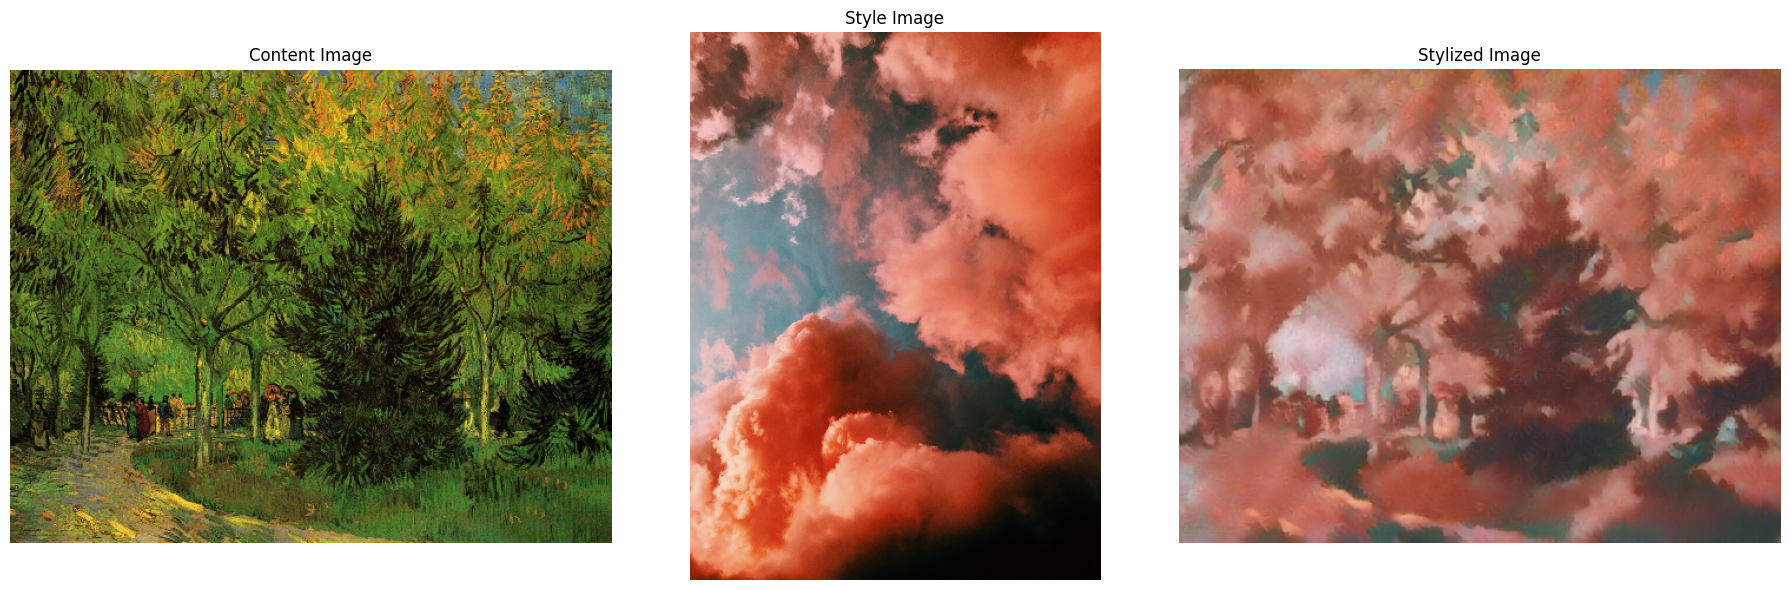

In [20]:
import os
import tensorflow as tf
# Load compressed models from tensorflow_hub
os.environ['TFHUB_MODEL_LOAD_FORMAT'] = 'COMPRESSED'

import IPython.display as display

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (18, 6)
mpl.rcParams['axes.grid'] = False

import numpy as np
import PIL.Image
import time
import functools

def tensor_to_image(tensor):
    tensor = tf.squeeze(tensor, axis=0)
    tensor = tf.clip_by_value(tensor * 255, 0, 255)
    tensor = tf.cast(tensor, tf.uint8)
    img = tf.image.encode_png(tensor)
    return PIL.Image.open(io.BytesIO(img.numpy()))

def load_img(path_to_img):
    max_dim = 512

    # Read the image file
    img = tf.io.read_file(path_to_img)

    # Decode and resize the image while preserving the aspect ratio
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)

    shape = tf.shape(img)
    height, width = shape[0], shape[1]

    scale = tf.constant(max_dim, dtype=tf.float32) / tf.cast(tf.maximum(height, width), tf.float32)
    new_height = tf.cast(tf.cast(height, tf.float32) * scale, tf.int32)
    new_width = tf.cast(tf.cast(width, tf.float32) * scale, tf.int32)

    img = tf.image.resize(img, (new_height, new_width))
    img = tf.expand_dims(img, axis=0)

    return img


def imshow(image, title=None):
    if tf.rank(image) > 3:
        image = tf.squeeze(image, axis=0)

    plt.imshow(image)
    if title:
        plt.title(title)
    plt.axis('off')

content_image = load_img('/content/A Lane in the Public Garden at Arles.jpg')
style_image = load_img('/content/laura-vinck-Hyu76loQLdk-unsplash.jpg')

plt.figure()

plt.subplot(1, 3, 1)
imshow(content_image, 'Content Image')

plt.subplot(1, 3, 2)
imshow(style_image, 'Style Image')

import tensorflow_hub as hub
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]

plt.subplot(1, 3, 3)
imshow(stylized_image, 'Stylized Image')

plt.tight_layout()
plt.show()
